<a href="https://colab.research.google.com/github/emmafisch/NGG6050/blob/main/Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score
from scipy import stats

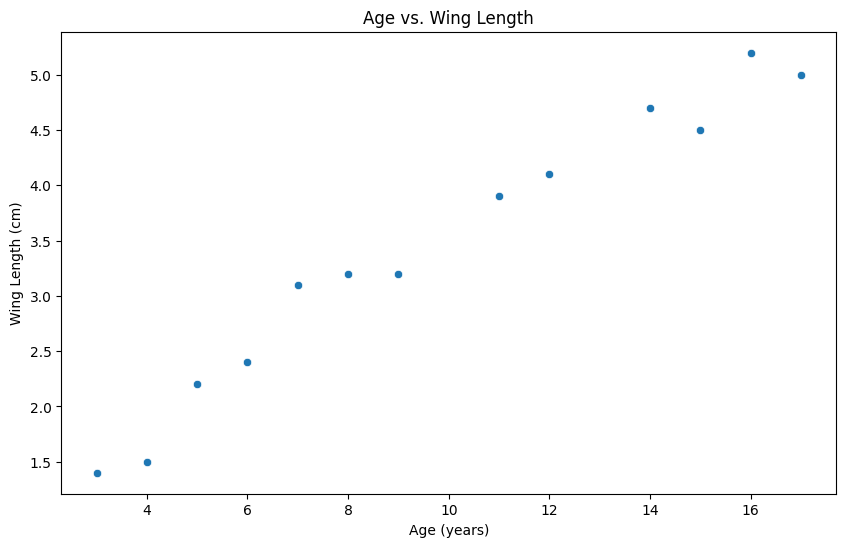

In [9]:
# Question 1:
# Plot the relationship between Age and Wing Length.

# Creating array for age and wing length
age = np.array([3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17])
wing_length = np.array([1.4, 1.5, 2.2, 2.4, 3.1, 3.2, 3.2, 3.9, 4.1, 4.7, 4.5, 5.2, 5.0])

# Create scatterplot of wing vs tail length
plt.figure(figsize=(10, 6))
sns.scatterplot(x=age, y=wing_length, marker='o')
plt.title('Age vs. Wing Length')
plt.xlabel('Age (years)')
plt.ylabel('Wing Length (cm)')
plt.show()

Slope of the regression line: 0.2646841206602163
Intercept of the regression line: 0.8296243597040407
Equation for regression line: y = 0.26x + 0.83
Slope calculated manually: 0.26468412066021585


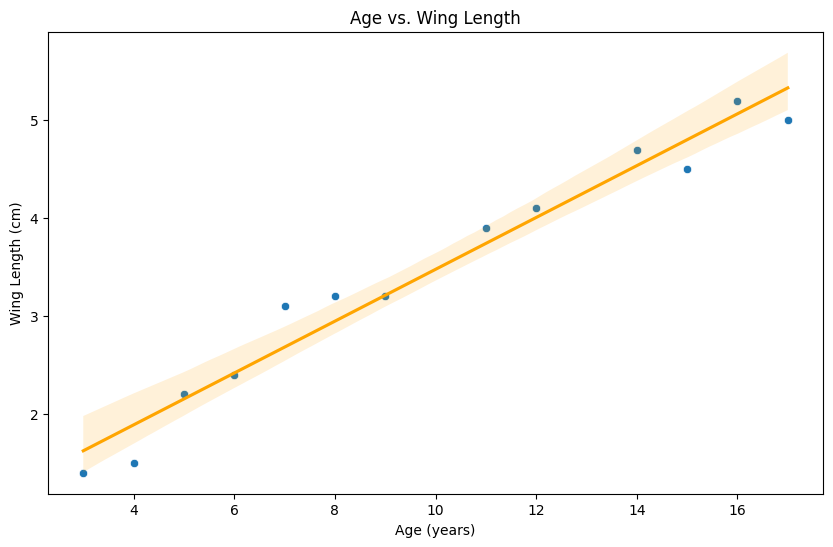

In [10]:
# Question 2:
# Calculate and plot the regression line.

# Calculate regression line for age vs. wing span relationship
slope, intercept, r_value, p_value, std_err = stats.linregress(age, wing_length)
print("Slope of the regression line:", slope)
print("Intercept of the regression line:", intercept)
print(f'Equation for regression line: y = {slope:.2f}x + {intercept:.2f}')

# Manually calculating slope to check
xy_sum = 0
for i in range(len(age)):
    x = age[i]
    y = wing_length[i]
    xy_sum += x * y
numerator = xy_sum - ((np.sum(age) * np.sum(wing_length)) / len(age))
denominator = np.sum(np.square(age)) - ((np.sum(age) ** 2) / len(age))
slope_manual = numerator / denominator
print("Slope calculated manually:", slope_manual)

# Plot regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x=age, y=wing_length, marker='o')
sns.regplot(x=age, y=wing_length, scatter=False, color='orange')
slope, intercept, r_value, p_value, std_err = stats.linregress(age, wing_length)
plt.title('Age vs. Wing Length')
plt.xlabel('Age (years)')
plt.ylabel('Wing Length (cm)')
plt.show()

In [11]:
# Question 3:
# Can you reject Ho: slope = 0?
print(f'P-val = {p_value}')
print("Yes, you can reject the null hypothesis.")

P-val = 3.0097431724571258e-09
Yes, you can reject the null hypothesis.


Slope 95% CI: [0.23043928 0.29892896]


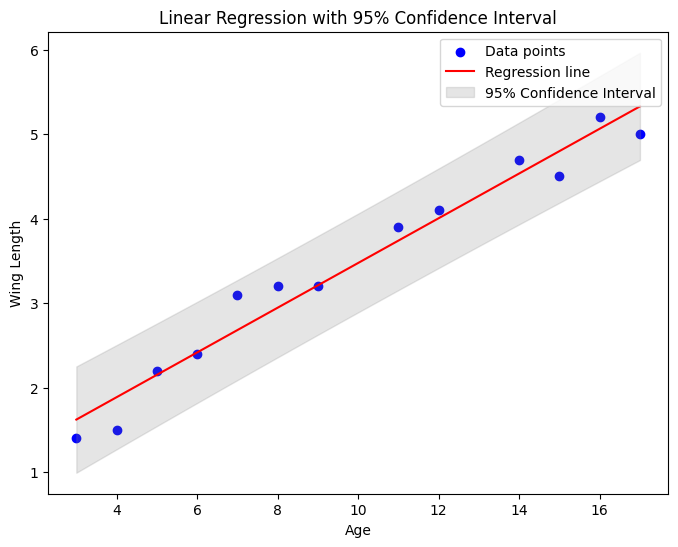

In [18]:
# Question 4:
# Calculate and plot the confidence intervals on the slope of the regression.

# Equation for CI of slope: CI = slope +- t-stat(alpha/2, n-2) * sqrt((MSE) / sum((xi-xmean)**2))

import statsmodels.api as sm

import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Example arrays: x and y
x = age
y = wing_length

# Step 1: Perform OLS regression
X = sm.add_constant(x)  # Add constant (intercept) to the model
model = sm.OLS(y, X)
results = model.fit()

# Step 2: Get the confidence intervals for the slope
conf_intervals = results.conf_int(alpha=0.05)  # 95% confidence interval
slope_conf_int = conf_intervals[1]  # The slope corresponds to the second parameter (index 1)

print(f"Slope 95% CI: {slope_conf_int}")

# Step 3: Plot the data points and regression line
plt.figure(figsize=(8, 6))

# Scatter plot
plt.scatter(x, y, color='blue', label='Data points')

# Regression line
slope = results.params[1]  # Slope
intercept = results.params[0]  # Intercept
regression_line = intercept + slope * x
plt.plot(x, regression_line, color='red', label='Regression line')

# Plot confidence interval as shaded region
# Generate points for the prediction
x_vals = np.linspace(x.min(), x.max(), 100)
y_pred = intercept + slope * x_vals

# Calculate confidence intervals for each point (manual approach using the formula)
from statsmodels.sandbox.regression.predstd import wls_prediction_std
prstd, iv_l, iv_u = wls_prediction_std(results, exog=sm.add_constant(x_vals), alpha=0.05)

# Plot the confidence interval for the regression line
plt.fill_between(x_vals, iv_l, iv_u, color='gray', alpha=0.2, label='95% Confidence Interval')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Wing Length')
plt.title('Linear Regression with 95% Confidence Interval')
plt.legend()

# Show the plot
plt.show()



In [19]:
# Question 5:
# Calculate r-squared (the coefficient of determination)

r_sq = r2_score(age, wing_length)
print(f'R-squared = {r_sq}')

R-squared = -1.4849459305634607


In [20]:
# Question 6:
# Calculate Pearson's r

rho = np.corrcoef(age, wing_length)[0, 1]
print(f'Pearsons r = {rho}')

Pearsons r = 0.9815203776816279


Original R-squared: 0.9633822518042857
Noisy R-squared: 0.9305445252058204


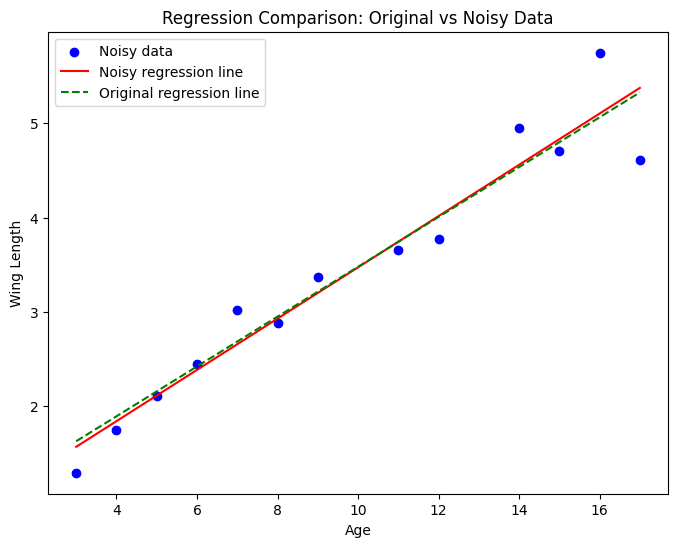

In [22]:
# Question 7:
# Add

x = age
y = wing_length

# Step 1: Add noise to y
noise = np.random.normal(0, 0.3, size=len(y))  # Add Gaussian noise (mean=0, std=0.3)
y_noisy = y + noise  # New y with noise

# Step 2: Perform OLS regression on noisy data
X_noisy = sm.add_constant(x)
model_noisy = sm.OLS(y_noisy, X_noisy)
results_noisy = model_noisy.fit()

# Step 3: Compare R-squared before and after noise
X = sm.add_constant(x)  # Adding constant for original data (without noise)
model_original = sm.OLS(y, X)
results_original = model_original.fit()

r_squared_original = results_original.rsquared
r_squared_noisy = results_noisy.rsquared

print(f"Original R-squared: {r_squared_original}")
print(f"Noisy R-squared: {r_squared_noisy}")

# Step 4: Plot original and noisy regression lines
plt.figure(figsize=(8, 6))

# Scatter plot (noisy data)
plt.scatter(x, y_noisy, color='blue', label='Noisy data')

# Regression line (noisy)
slope_noisy = results_noisy.params[1]
intercept_noisy = results_noisy.params[0]
regression_line_noisy = intercept_noisy + slope_noisy * x
plt.plot(x, regression_line_noisy, color='red', label='Noisy regression line')

# Original regression line (without noise)
slope_original = results_original.params[1]
intercept_original = results_original.params[0]
regression_line_original = intercept_original + slope_original * x
plt.plot(x, regression_line_original, color='green', linestyle='--', label='Original regression line')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Wing Length')
plt.title('Regression Comparison: Original vs Noisy Data')
plt.legend()

# Show the plot
plt.show()
